In [22]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the data
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

In [3]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [4]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [5]:
# Convert date columns to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [6]:
# Calculate the date 30 days before the last recorded date
cutoff_date = df['last_trip_date'].max() - pd.Timedelta('30 days')

In [7]:
# Create the 'retained' column
df['retained'] = (df['last_trip_date'] >= cutoff_date).astype(int)

In [8]:
# Drop 'last_trip_date' column as it's no longer needed
df.drop('last_trip_date', axis=1, inplace=True)

In [10]:
# Verify the data and 'retained' column
print(df.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge    phone  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0       1.10   iPhone       15.4                 True         46.2      3.67   
1       1.00  Android        0.0                False         50.0      8.26   
2       1.00   iPhone        0.0                False        100.0      0.77   
3       1.14   iPhone       20.0                 True         80.0      2.36   
4       1.19  Android       11.8                False         82.4      3.13   

   avg_rating_by_driver  retained  
0       

In [11]:
# Check for missing values
print(df.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64


In [12]:
# Explore data distribution and summary statistics
print(df.describe())

       trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  \
count  50000.000000  50000.000000  50000.000000          49799.000000   
mean       8.849536     60.926084      5.796827              4.778158   
std       19.958811     37.081503      5.707357              0.446652   
min        0.000000      0.000000      0.000000              1.000000   
25%        0.

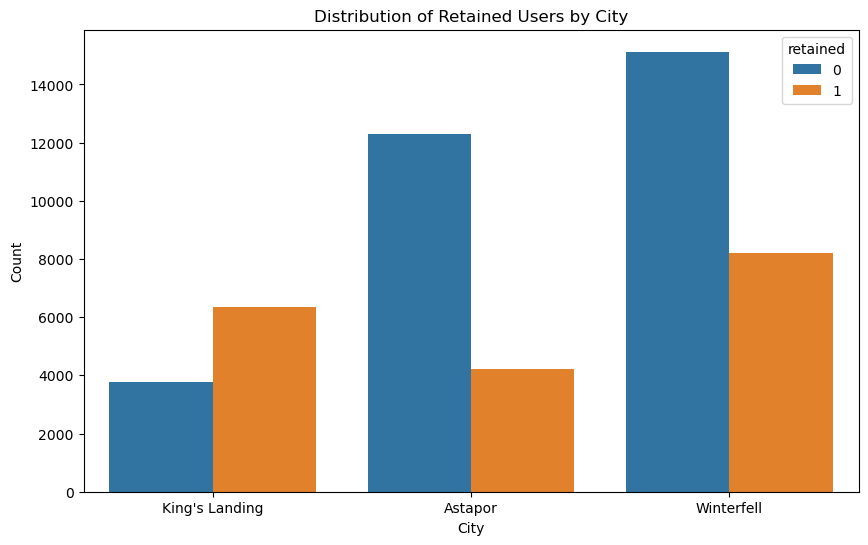

In [14]:
# Distribution of retained users by city
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='retained', data=df)
plt.title('Distribution of Retained Users by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

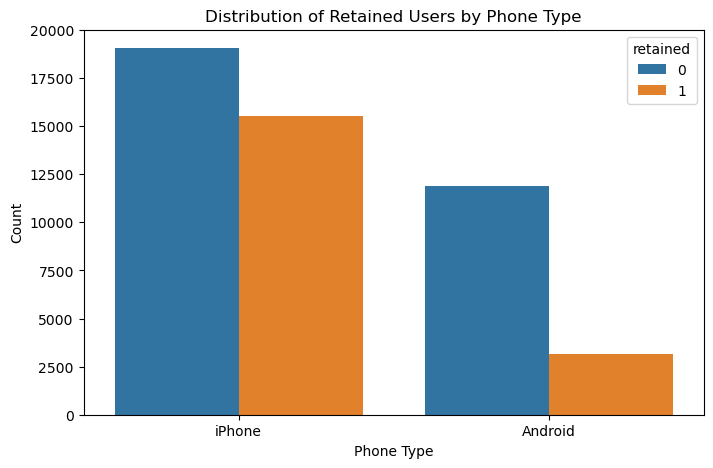

In [15]:
# Distribution of retained users by phone type
plt.figure(figsize=(8, 5))
sns.countplot(x='phone', hue='retained', data=df)
plt.title('Distribution of Retained Users by Phone Type')
plt.xlabel('Phone Type')
plt.ylabel('Count')
plt.show()


In [18]:
# Fraction of observed users who were retained
fraction_retained = df['retained'].mean()

print(f"Fraction of observed users retained: {fraction_retained:.2%}")

Fraction of observed users retained: 37.61%


In [19]:
# Dropping unnecessary columns and handling missing values
df.drop(['signup_date'], axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_9924\1637924908.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [20]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'])

In [21]:
# Split data into features and target variable
X = df.drop('retained', axis=1)
y = df['retained']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
# Fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Predictions
y_pred = rf_classifier.predict(X_test)

In [29]:
# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7524

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      6219
           1       0.68      0.65      0.67      3781

    accuracy                           0.75     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



In [30]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                       Feature  Importance
5                    avg_dist    0.299216
4                 weekday_pct    0.138702
6        avg_rating_by_driver    0.110595
0      trips_in_first_30_days    0.081130
1        avg_rating_of_driver    0.080648
3                   surge_pct    0.074484
2                   avg_surge    0.069707
8         city_King's Landing    0.043077
11               phone_iPhone    0.020432
10              phone_Android    0.019240
7                city_Astapor    0.017754
13   ultimate_black_user_True    0.017145
12  ultimate_black_user_False    0.015577
9             city_Winterfell    0.012293


Ultimate can use the insights from the model to identify the most important factors affecting rider retention. For example, if the model indicates that the number of trips in the first 30 days and whether the user is an Ultimate Black user are significant predictors of retention, Ultimate can focus on strategies to encourage users to take more trips in the initial period and promote Ultimate Black services. Additionally, Ultimate can use targeted marketing campaigns or incentives based on user characteristics identified as important by the model to improve long-term retention rates.